In [ ]:
# Keep this code cell here
# Project title will be used by the reviewer
PROJECT_TITLE = "MH2_FALL2020_Project"
NOTEBOOK_ID   = "1jcCwJDjLQhTfzc8SjwJD4QENQDiC-kVu"
VERSION = "FA20.10.10.2020"


---
# Project Introduction

What are the most significant contributers to a healthy lifestyle? What we can do to maintain mental health while achieving sustainable development? This project will look into a dataset containing $12757$ responses with $23$ attributes from **Your Work-Life Balance** survey, which evaluates how we thrive in both our professional and personal lives. The survey questions reveals how well we shape our lifestyle to maximize our overall life satisfaction from the following five aspects:

- Physical health
- Mental health
- Professional development
- Social connection
- Life meaning

The project will explore correlation between two response variables, _stress level_ and _personal achievement_. But more importantly, it will attempt to reveal how stress and achievement are related to our life aspects. For example, does eating more fruits and vegetables help reduce stress, or does performing meditation helps us achieve our goals? Through developing models to predict stress and achievement using machine learning techniques, I hope the results will provide insights in how we can adjust our lifestyles to optimize our well-beings.

![](https://drive.google.com/uc?id=1_i0g9MLZup94-1IINxZKmFFt16DT-zft)

**Let's get started!**


<!-- this is a comment -->
<!-- 

   VIDEO INSTRUCTIONS

1. upload to google drive, get the share URL
https://drive.google.com/file/d/1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

2. convert to export URL:
http://drive.google.com/uc?export=download&id=1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

3. OR use some other service to host your video:
https://storage.googleapis.com/uicourse/videos/dmap/Exact%20Instructions%20Challenge%20-%20THIS%20is%20why%20my%20kids%20hate%20me.%20%20Josh%20Darnit.mp4

replace the src="YOUR VIDEO URL" in the <source> tag in the next cell below
-->

In [ ]:
%%html
<!-- this should be the ONLY html cell in the notebook: use markdown -->
<div style="font-size:36px; max-width:800px; font-family:Times, serif;">
 Video that walks through the notebook
<video width="600" controls>
  <source src="https://drive.google.com/uc?export=download&id=1JPeRDybVURwbgCJEPLxiQBJdNnFT1YSe"
  type="video/mp4">
</video>
</div>

In [ ]:
# add your imports here for your entire project
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
import sklearn.linear_model as lm

In [ ]:
# read in data
file_id = 'https://drive.google.com/file/d/18zSk8UIDRfWvdo1E_ksfdSzbdxU7j20q/view?usp=sharing'.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
csv_raw = requests.get(dwn_url).text
url = io.StringIO(csv_raw)
life = pd.read_csv(url)

# Data Acquisition, Selection, Cleaning

The dataset contains 12756 responses from **Your Work-Life Balance survey**. For details on each of the survey questions, check [link to survey](http://www.authentic-happiness.com/your-life-satisfaction-score)

Peak of the data:

In [ ]:
life.head(5)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
0,7/7/15,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female
1,7/7/15,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female
2,7/7/15,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female
3,7/7/15,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female
4,7/7/15,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female



**Variable Descriptions**:
- `Daily Stress` (Response Variable): stress level
- `Achievement` (Response Variable): number of personal achievements
- `Fruit and Veggies`: number of servings per day, enter 5 if 5 or more
- `Places Visited`: new place visited
- `Core Circle`: number of people close to you
- `Donations`: number of donations for good cause
- `Supporting Others`: people you help
- `Social Network`: people you interact with
- `BMI Range`: 1 = below 25, 2 = above 25
- `ToDo Completed`: how well you complete your weekly todo list
- `Flow`: number of hours you experience fully immersed in performing an activity
- `Daily Steps`: (thousands) of steps you walk
- `Live Vision`: for how many years ahead is your life vision clear for
- `Sleep hours`: 1 to 10
- `Lost Vacation`: unused vacation day
- `Daily Shouting`: 1 to 10
- `Sufficient Income`: 1 = insufficient, 2 = sufficient
- `Personal Awards`: number of personal awards
- `Time For Passion`: time spent doing what you are passionate about
- `Daily Meditation`: number of times to think about yourself
- `Age`: 1 = 'Less than 20', 2 = '21 to 35', 3 = '36 to 50', 4 = '51 or more'
- `Gender`: 0 is male, 1 is female

**Data Cleaning**
1. Check for _NAN_ values and values that need to be corrected:
- There are no missing values in this dataset
- Observe that the $10006$th observation contains suspect value in *Daily Stress* column. Therefore, it should be removed.



In [ ]:
life["DAILY_STRESS"][10005]

'1/1/00'



2. Feature engineering
- Since we are not doing time-series analysis, the *Time Stamp* column will be dropped.
- *BMI Range* only contains 2 values and will be converted into a categorical variable
- *Sufficient Income* only contains 2 values and will be converted into a categorical variable
- The rest of the features are all ordered and will be converted into continuous variables


In [ ]:
# This section prepares the data for analysis
life = life.drop('Timestamp', axis = 1) # drop Timestamp since we are not doing time series analysis
life = life.drop([10005]) # remove suspect value

life.columns= life.columns.str.lower() # convert all variable names to lowercase

# rename age categories 
life.loc[(life.age == 'Less than 20'),'age']='a0'
life.loc[(life.age == '21 to 35'),'age']='a1'
life.loc[(life.age == '36 to 50'),'age']='a2'
life.loc[(life.age == '51 or more'),'age']='a3'
life.age = life.age.astype('category') # convert it into a categorical variable

# convert gender into a categorical variable
life.gender = life.gender.astype('category')

# convert sufficient_income into a categorical variable
life.sufficient_income = life.sufficient_income.astype('category')

# convert bmi_range into a categorical variable
life.bmi_range = life.bmi_range.astype('category')

# convert daily_stress into a numeric variable
life.daily_stress = life.daily_stress.astype('int')



In [ ]:
life.dtypes # double check data types

fruits_veggies          int64
daily_stress            int64
places_visited          int64
core_circle             int64
supporting_others       int64
social_network          int64
achievement             int64
donation                int64
bmi_range            category
todo_completed          int64
flow                    int64
daily_steps             int64
live_vision             int64
sleep_hours             int64
lost_vacation           int64
daily_shouting          int64
sufficient_income    category
personal_awards         int64
time_for_passion        int64
daily_meditation        int64
age                  category
gender               category
dtype: object

3. Analysis Techniques

- Notice that *Daily Stress* and *Achievement* are ordered variables. Therefore, we can fit linear regression models will separately on these two variables. I plan to try *sklearn.linear_model.LinearRegression* and *RandomForestRegressor* to see which algorithm outputs better models.

# Data Exploration

###Distribution of response variables:

`achievement` is right skewed (with mean $>$ median), probably due to a large number in `achievement` $=$ 10

Text(0.5, 0, 'Achievement')

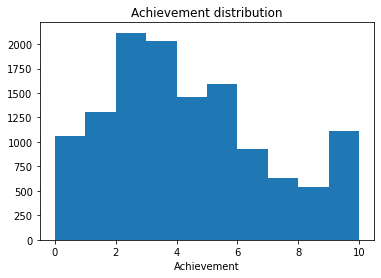

In [ ]:
#plt.figure(figsize=(10, 4))
plt.hist(life['achievement'])
plt.title('Achievement distribution')
plt.xlabel('Achievement')

`daily_stress` is left skewed (with mean $<$ median). This indicates that most people that took the survey did not experience serious stress.

Text(0.5, 0, 'Daily stress')

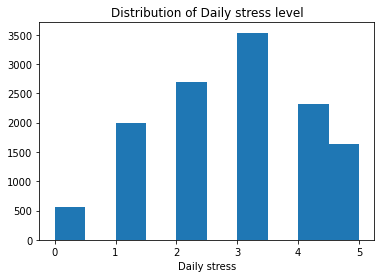

In [ ]:
plt.hist(life['daily_stress'])
plt.title('Distribution of Daily stress level')
plt.xlabel('Daily stress')

###Distribution of Categorical predictors

- teenagers only occupy a small proportion of the sample
- It seems that females were more likely to take the survey
- Most people who took the survey have normal `bmi`
- Most people who took the survey have sufficient income (might lead to low average `daily_stress` )

Text(0.5, 1.0, 'income')

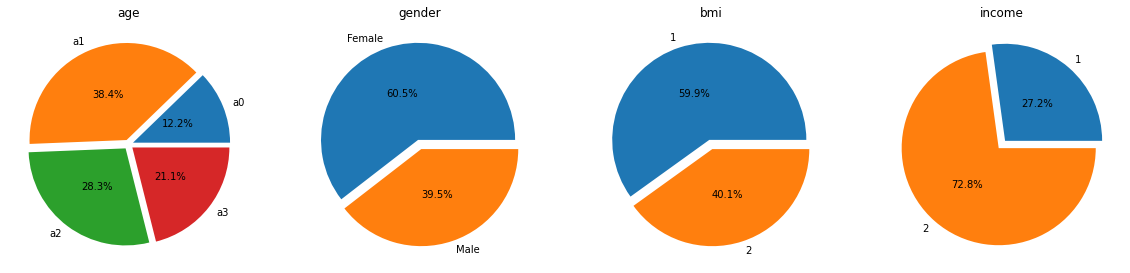

In [ ]:
age = life.groupby('age').size()
gender = life.groupby('gender').size()
bmi = life.groupby('bmi_range').size()
income = life.groupby('sufficient_income').size()

fig, ax = plt.subplots(1, 4, figsize = (20,10))

ax[0].pie(x=age, autopct="%.1f%%", explode=[0.05]*4, labels=age.keys(), pctdistance=0.5)
ax[0].set_title('age')

ax[1].pie(x=gender, autopct="%.1f%%", explode=[0.05]*2, labels = gender.keys(), pctdistance=0.5)
ax[1].set_title('gender')

ax[2].pie(x=bmi, autopct="%.1f%%", explode=[0.05]*2, labels=bmi.keys(), pctdistance=0.5)
ax[2].set_title('bmi')

ax[3].pie(x=income, autopct="%.1f%%", explode=[0.05]*2, labels=income.keys(), pctdistance=0.5)
ax[3].set_title('income')

###Variable correlation

It seems that `achievement` and `daily_stress` are slightly negatively correlated, which might mean that the more stress a person experiences, the less achievement he may obtain. 

In [ ]:
life['achievement'].corr(life['daily_stress'])

-0.1207857817975586

Since there are lots of features in this data set, it will be good to test for how each feature is related to the response variables. To visualize the correlation, I employed the heatmap function from seaborn.

In [ ]:
factor_features = ['bmi_range', 'age', 'gender', 'sufficient_income']
corr = (life.drop(factor_features, axis = 1)).corr() # compute correlation between numerical variables

Text(0.5, 1.0, 'Correlation between numerical variables')

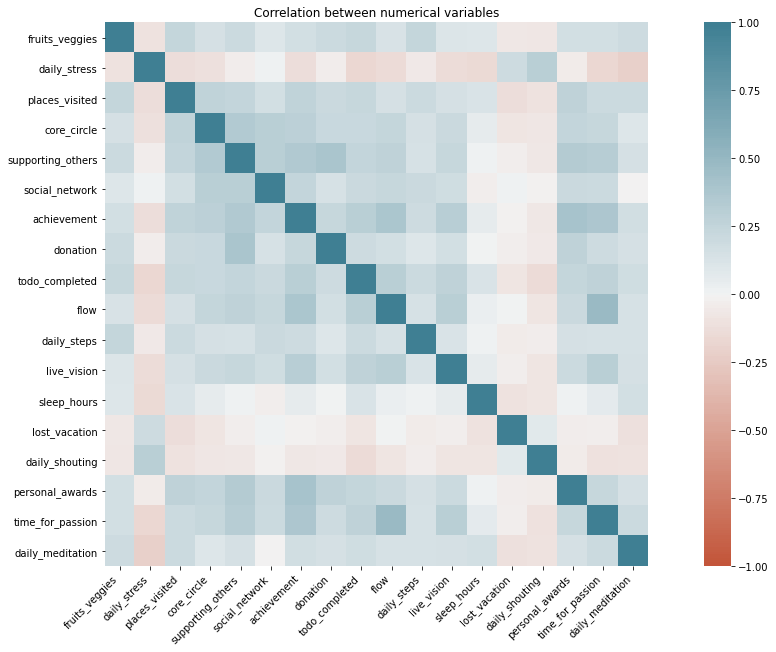

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between numerical variables')

`achievement` has a noticeable correlation ($\geq 0.2$) with:

- `core_circle`
- `donation`
- `places_visited`
- `supporting_others`
- `social_network`
- `todo_completed`
- `flow`
- `live_vision`
- `personal_awards`
- `time_for_passion`

`daily_stress` has a noticeable positive correlation with:
- `daily_shouting`
- `lost_vocation`

and negative correlation with:
- `daily_meditation`
- `todo_completed`
- `time_for_passion`
- `sleep_hours`

**Initial observation**

Features positively contribute to `achievement` all negatively contribute to `daily_stress`, which is expected, since the two responses are negatively correlated.

# Data Analysis

### Splitting data

Now we will split the data set into training and testing set according to a $4:1$ ratio. We will then fit models separately on the two response variables.

**Feature engineering**
1. Errors will occur when non_numerical values are plugged into `sklearn` algorithms. To deal with this, we will use _One-Hot-Encoding_ to transform them into binary variables. Below is how One-Hot-Encoding works:

![](https://drive.google.com/uc?id=1Ngjcn2p-MLboWqLR-Zmk7rzE2uafyFag)


**K Folds Cross Validation**

Apart from manually train/test splitting the data, we can also use the `RepeatedKFold` method to do `K folds-cross-validation` to see how a model performs on the data set.

Here is how it works:

1. First shuffle the dataset randomly.
2. Split the dataset into k groups.
3. For each group:
- Select a group as test set
- Set the remaining groups as training set
- Fit a model on the training set and evaluate it on the test set
- Record the score
- Repeat
4. The overall performance of the model will be evaluated by averaging the score of the $k$ models.


![](https://drive.google.com/uc?id=1GtAtHhLVwj06xlIQ6oDRbRwJI91JETlt)


The following function will manually split train/test set.

In [ ]:
# train/test splitter
def split_data(X, y):
  return sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

### Machine learning algorithms

It will be time-consuming and expensive to use all features in the original data set. Therefore, algorithms that include variable selection are desired. We will use LASSO Regression and Random Forest here.

**LASSO Regression**

Lasso regression is a type of linear regression, including a penalty term. The acronym 'LASSO' stands for Least Absolute Shrinkage and Selection Operator.

How it performs variable selection:

Lasso regression uses $L1$ regularization that adds a penalty equal to the absolute value of the coefficients (excluding the intercept). Larger penalties eliminates more coefficients, which is the idea of producing simpler models. The goal is to minimize

$\sum\limits_{i=1}^n (y_i - \sum\limits_{j} x_{ij}\beta_{ij})^2 + \lambda \sum\limits_{j=1}^n \lvert \beta_j \rvert)$

The tuning parameter $\lambda$ controls the strength of the $L1$ penalty.

In this analysis, a list of $100$ $\lambda$s ranging from $0$ to $1$ will be used.

**Random Forest**

Random forest is a supervised learning algorithm. It constructs a number of decision trees on the training set and output _the mode of the classes_ or _mean prediction_ of the individual trees based on the response variable type. 

In our scenario, we will use Random Forest to do regression.

![](https://drive.google.com/uc?id=11jjsZda6IEuKft4EsiuWAOHscur4PMgX)





### Predicting achievement

The following class contains all we need to develop models to predict `achievement`.

The class has the following attributes:

- `X`: the feature matrix (each column represents a feature)
- `y`: reponse variable (achievement)
- `X_trn`: the feature matrix of the training set
- `X_tst`: feature matrix of the test set
- `y_trn`: response variable of the training set
- `y_tst`: response variable of the test set

and 2 methods:

- `fit_lasso`: with 10 folds cross validation, fits Lasso regression model in each fold using a list of given $\lambda$s

- `fit_rf`: fits Random Forest models with 1000 Decision trees on the training set


In [ ]:
class achievement(object):

  # the constructor takes in the entire life data set and split it into predictors and response (achievement)
  def __init__(self, exclude=False):

    # Creating predictors and reponses
    # exclude indicates whether to use `age` and `gender` as predictors
    if exclude == True:
      X_raw = life.drop(['daily_stress', 'achievement', 'age', 'gender'], axis = 1)
    else:
      X_raw = life.drop(['daily_stress', 'achievement'], axis = 1) # X is a feature matrix containing all predictors

    self.y = life['achievement']
    
    # Encode X using One Hot Encoding, since X contains categorical variables
    self.X = pd.get_dummies(X_raw) # get_dummies automatically uses One Hot Encoding
    
    # split train/test set
    self.X_trn, self.X_tst, self.y_trn, self.y_tst = split_data(self.X, self.y)
  
  def fit_lasso(self, lambdas = np.arange(0, 1.01, 0.01)):
    # create 10 folds
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define LASSO model
    lasso = lm.LassoCV(alphas=lambdas, cv=cv, n_jobs=-1) # n_jobs = -1 means using all CPUs
    # fit model
    lasso.fit(self.X, self.y)
    return lasso

  def fit_rf(self):
    # fit Random Forest model on the training set
    # models are evaluated based on mean squared error
    rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1, criterion='mse')
    rf.fit(self.X_trn, self.y_trn) 
    return rf

### Predicting daily stress

The following class contains all we need to develop models to predict `daily_stress`.

The class has the following attributes:

- `X`: the feature matrix (each column represents a feature)
- `y`: reponse variable (daily_stress)
- `X_trn`: the feature matrix of the training set
- `X_tst`: feature matrix of the test set
- `y_trn`: response variable of the training set
- `y_tst`: response variable of the test set

and 2 methods:

- `fit_lasso`: with 10 folds cross validation, fits Lasso regression model in each fold using a list of given $\lambda$s

- `fit_rf`: fits Random Forest models with 1000 Decision trees on the training set

In [ ]:
class daily_stress(object):

  # the constructor takes in the entire life data set and split it into predictors and response (daily_stress)
  def __init__(self, exclude=False):

    # Creating predictors and reponses
    # exclude indicates whether to use `age` and `gender` as predictors
    if exclude == True:
      X_raw = life.drop(['daily_stress', 'achievement', 'age', 'gender'], axis = 1)
    else:
      X_raw = life.drop(['daily_stress', 'achievement'], axis = 1) # X is a feature matrix containing all predictors

    self.y = life['daily_stress']
    
    # Encode X using One Hot Encoding, since X contains categorical variables
    self.X = pd.get_dummies(X_raw) # get_dummies automatically uses One Hot Encoding
    
    # split train/test set
    self.X_trn, self.X_tst, self.y_trn, self.y_tst = split_data(self.X, self.y)
  
  # Lasso regression
  def fit_lasso(self, lambdas = np.arange(0, 1.01, 0.01)):
    # create 10 folds
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define LASSO model
    lasso = lm.LassoCV(alphas=lambdas, cv=cv, n_jobs=-1)
    # fit model
    lasso.fit(self.X, self.y)
    return lasso
  
  # Random Forest regression
  def fit_rf(self):
    # fit Random Forest model on the training set
    # models are evaluated based on mean squared error
    rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1, criterion='mse')
    rf.fit(self.X_trn, self.y_trn)
    return rf

### Now we can go ahead and fit the models!

In [ ]:
# fit model to predict achievement
predict_achieve = achievement()
achieve_lasso = predict_achieve.fit_lasso() # fit lasso regression model
achieve_rf = predict_achieve.fit_rf() # fit random forest model
# may take a minute to run, along with some warning messages

In [ ]:
# fit model to predict daily stress
predict_stress = daily_stress()
stress_lasso = predict_stress.fit_lasso() # fit lasso regression model
stress_rf = predict_stress.fit_rf() # fit random forest model
# this might take a minute to run and produce some warnings

**How our models perform?**

We will use the _coefficient of determination_ to evaluate the performance of model.

The coefficient of determination is interpreted as the proportion of observed variation in response that can be explained by the model. Below is how it is computed:

$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$

![](https://drive.google.com/uc?id=11zwGRQdJx9mXL6cnRQgvrL_9KvUG5fsI)

$R^2$ reveals how many observations fall within the regression line. **A higher $R^2$ indicates a better fit.**

**For `achievement`**

In [ ]:
print('coefficient of determination of lasso model = ', 
      achieve_lasso.score(predict_achieve.X, predict_achieve.y)) # r2 value of fitted model
# get_coefs(predict_achieve.X.columns, achieve_lasso.coef_)

coefficient of determination of lasso model =  0.34756692932314726


In [ ]:
print('coefficient of determination of random forest = ', 
      achieve_rf.score(predict_achieve.X_tst, predict_achieve.y_tst))
# get_coefs(predict_achieve.X.columns, achieve_rf.feature_importances_)


coefficient of determination of random forest =  0.3845986224624047


**For `daily stress`**

In [ ]:
print('correlation coefficient of lasso model = ', 
      stress_lasso.score(predict_stress.X, predict_stress.y)) # r2 value of fitted model
# get_coefs(predict_stress.X.columns, stress_lasso.coef_)

correlation coefficient of lasso model =  0.20648975894363972


In [ ]:
print('correlation coefficient of random forest = ', stress_rf.score(predict_stress.X_tst, predict_stress.y_tst))
# get_coefs(predict_stress.X.columns, stress_rf.feature_importances_)

correlation coefficient of random forest =  0.23210778049022832


**What if we exclude age and gender?**

Although `age` and `gender` are considered important features in predicting `achievement` and `daily_stress`, they are not helpful in providing suggestions on adjusting our lifestyle  to optimize our wellbeings. (normally we cannot adjust our age :( )

Since we desire a less complex model with less features, why not try to fit models without `age` and `gender` and see their performances?

**For `achievement`**

In [ ]:
# fit model to predict achievement 
predict_achieve_new = achievement(exclude=True)
achieve_lasso_new = predict_achieve_new.fit_lasso() # fit LASSO model
achieve_rf_new = predict_achieve_new.fit_rf() # fit Random Forest model
 # might take a minute to run, along with warning messages

In [ ]:
print('coefficient of determination of lasso model = ', 
      achieve_lasso_new.score(predict_achieve_new.X, predict_achieve_new.y)) # r2 value of fitted model
# get_coefs(predict_achieve_new.X.columns, achieve_lasso_new.coef_)

coefficient of determination of lasso model =  0.3431555626320285


In [ ]:
print('coefficient of determination of random forest = ', 
      achieve_rf_new.score(predict_achieve_new.X_tst, predict_achieve_new.y_tst))
# get_coefs(predict_achieve_new.X.columns, achieve_rf_new.feature_importances_)

coefficient of determination of random forest =  0.38107627137427


The results are almost the same as the full model. 

**For `daily stress`**

In [ ]:
# fit model to predict stress
predict_stress_new = daily_stress(exclude=True)
stress_lasso_new = predict_stress_new.fit_lasso() # fit LASSO model
stress_rf_new = predict_stress_new.fit_rf() # fit Random Forest model
# might take a minute to run, along with warning messages

In [ ]:
print('correlation coefficient of lasso model = ', 
      stress_lasso_new.score(predict_stress_new.X, predict_stress_new.y)) # r2 value of fitted model

correlation coefficient of lasso model =  0.19440597667937842


In [ ]:
print('correlation coefficient of random forest = ', 
      stress_rf_new.score(predict_stress_new.X_tst, predict_stress_new.y_tst))


correlation coefficient of random forest =  0.22100434911025366


The results are almost the same as the full model. 

**Therefore, we can use the simpler models instead.**

# Conclusion

The models do not reveal any causations between the features and responses. For instance, we would not know if more `daily shouting` leads to more stress or if it's in the opposite direction. But the models still revealed some cool insights on what factors closely relate to a high achieving and less stressful life.

We can take a look at the coefficients of selected features of each model:



In [ ]:
# display selected features and their coefficients in a nicer way
def get_coefs(coef_name, coef_matrix, display=False):
  coefs = {k:v for (k, v) in zip(coef_name, coef_matrix) if abs(v)>= 0.01}
  table = pd.DataFrame(coefs, index=[0])
  return table.transpose()

In [ ]:
from IPython.display import display_html

In [ ]:
achieve_lasso_coef = get_coefs(predict_achieve_new.X.columns, achieve_lasso_new.coef_)
stress_lasso_coef = get_coefs(predict_stress_new.X.columns, stress_lasso_new.coef_)

# displays two tables side by side
achieve_lasso_coef_styler = achieve_lasso_coef.style.set_table_attributes("style='display:inline'").set_caption('Achievement lasso')
stress_lasso_coef_styler = stress_lasso_coef.style.set_table_attributes("style='display:inline'").set_caption('Stress lasso')

display_html(achieve_lasso_coef_styler._repr_html_()+stress_lasso_coef_styler._repr_html_(), raw=True)


,0
fruits_veggies,-0.016095
places_visited,0.052556
core_circle,0.060320
supporting_others,0.085887
social_network,0.035021
donation,0.036719
todo_completed,0.074221
flow,0.193389
daily_steps,0.043231
live_vision,0.089879


`flow`, `personal awards`, `time for passion` and `bmi_range_1` positively contribute to `achievement`.

This means that a **high achievement life** comes along with: 
- being fully immersed in performing an activity
- pursuing personal interests
- maintaining health

`sleep hours`, `daily meditation` and `bmi_range_1` have stronger effects in reducing `daily_stress`. By the way, meditation does not mean immersing ourselves in deep thought. The exact question for `daily meditation` in the survey is :"In a typical week, how many times do you have the opportunity to think about yourself? Include meditation, praying and relaxation activities such as fitness, walking in a park or lunch breaks". This indicates that simply giving ourselves some time to disconnect with our work can also reduce stress.

Hence a **low stress life** comes along with:
- getting enough sleep (important!)
- giving yourself some time to meditate
- maintaining health

These findings lead to our main conclusion that to maintain a work life balance, we should **dedicate more to our wellbeings**. During busy times, I have skipped meals, stayed up late and sticked in front of the computer for hours (and I know that many of you guys have similar experiences.) Such a lifestyle does helped me obtain my goals, but has physically and mentally hurted me on the other hand. From now on, I will attempt to go to gym, practice meditation for several minutes and get enough sleep every day. 


---
# Submission Guidelines (keep this section here)
---


When you are ready to submit your project, part of the submission process will be to register your notebook for reviewing.  

You will also receive the links and instructions to do the peer reviews.

Please review the metadata:

In [ ]:
def get_metadata():
  meta = {
          "title": PROJECT_TITLE, # keep this as is
          "nb_id": NOTEBOOK_ID,   # keep this as is

          # permissions
          # do you give the instructor the permission to copy this project
          # and allow others to view it in the class gallery?
          "allow_gallery": True,
          
          # if your project is made viewable to others,
          # do you want to include your name (first/last)?
          "allow_name_release": True,

          'data' : 'https://drive.google.com/uc?export=download&id=18zSk8UIDRfWvdo1E_ksfdSzbdxU7j20q'
          }
  return meta

Specific instructions will come for what to submit for the various milestones.

If necessary, you can download the Python version of this notebook by using the `File->Download .py` as well as the notebook itself `File->Download .ipynb`.

